# I. Plotting the Distributions

## Importing necessary libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

## Loading the data

In [2]:
# "mw" stands for "minutes watched"
mw2021_p0 = pd.read_csv('minutes_watched_2021_paid_0.csv')
mw2021_p1 = pd.read_csv('minutes_watched_2021_paid_1.csv')
mw2022_p0 = pd.read_csv('minutes_watched_2022_paid_0.csv')
mw2022_p1 = pd.read_csv('minutes_watched_2022_paid_1.csv')

## Initial data exploration

In [3]:
mw2021_p0.head()

,student_id,minutes_watched,paid_in_q2
0,767,0.05,0
1,902,34.62,0
2,1067,0.27,0
3,1151,122.35,0
4,1395,133.52,0


In [4]:
mw2021_p1.head()

,student_id,minutes_watched,paid_in_q2
0,6,81.03,1
1,516,46.27,1
2,520,91.18,1
3,523,1322.25,1
4,594,3.73,1


In [5]:
mw2022_p0.head()

,student_id,minutes_watched,paid_in_q2
0,389,0.15,0
1,666,2.83,0
2,801,5732.58,0
3,875,46.77,0
4,1357,0.12,0


In [6]:
mw2022_p1.head()

,student_id,minutes_watched,paid_in_q2
0,6,67.08,1
1,616,116.02,1
2,618,238.15,1
3,699,222.35,1
4,702,1.60,1


## Plotting the distribution

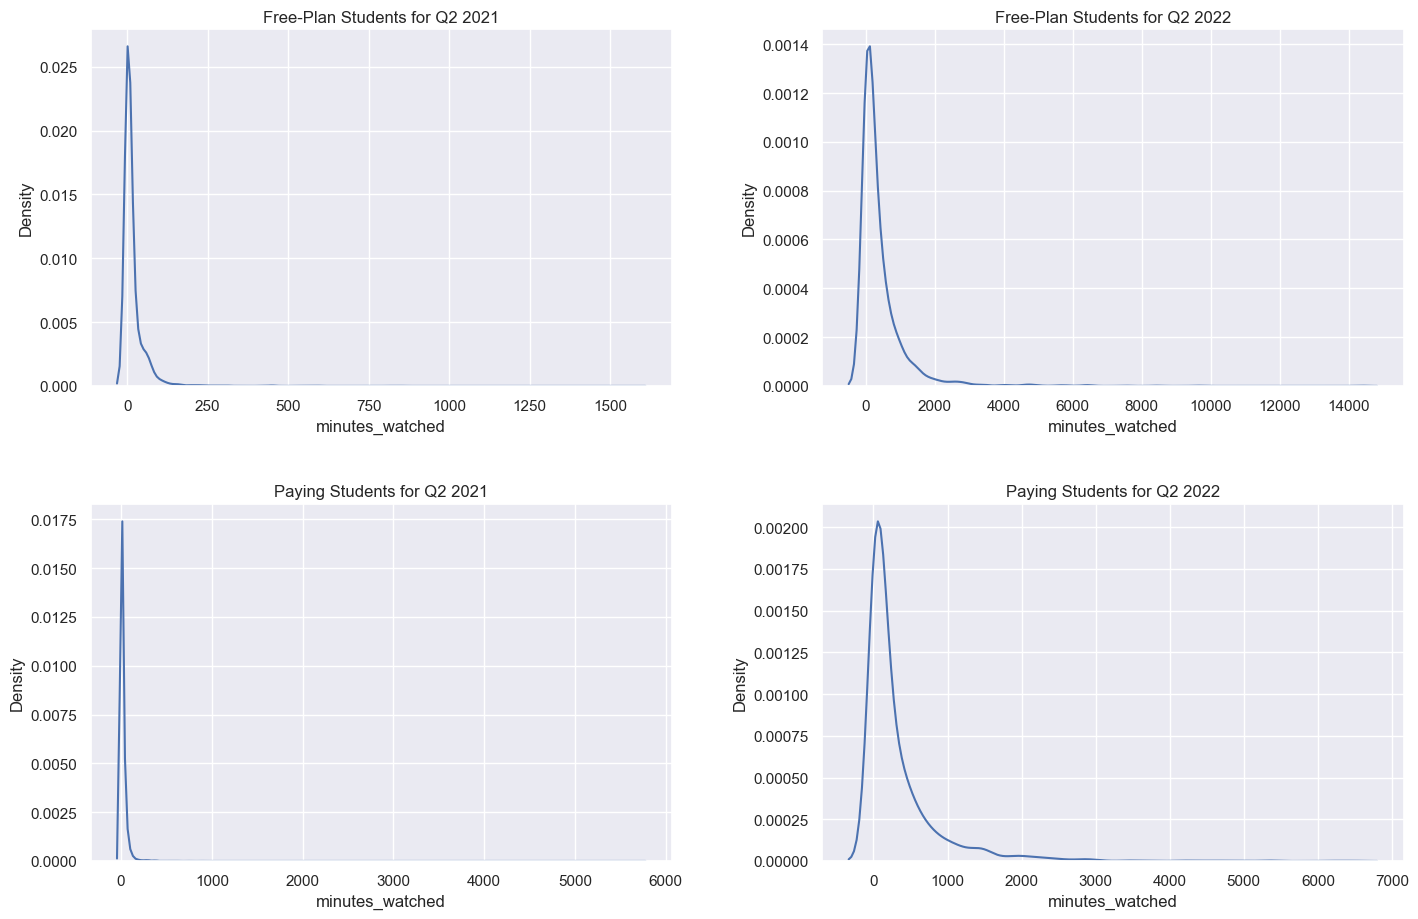

In [7]:
fig, axes = plt.subplots(2, 2, figsize = (15, 10))

sns.kdeplot(mw2021_p0['minutes_watched'], ax = axes[0, 0]).set(title = 'Free-Plan Students for Q2 2021')
sns.kdeplot(mw2021_p1['minutes_watched'], ax = axes[0, 1]).set(title = 'Free-Plan Students for Q2 2022')
sns.kdeplot(mw2022_p0['minutes_watched'], ax = axes[1, 0]).set(title = 'Paying Students for Q2 2021')
sns.kdeplot(mw2022_p1['minutes_watched'], ax = axes[1, 1]).set(title = 'Paying Students for Q2 2022')

fig.tight_layout(pad = 3.0)

plt.show()

From the plot, it can be seen that all of these distributions are skewed to the right and not symetrically distributed around the mean.

This means that we expect outliers in the higher end of the values, this skewness shows that for the outliers in the data, there are students who watched much more than most of the students on the platform.

The presence of these outliers will skew all metrics from our analysis later on, such as mean, median, and standard deviation.

#  II. Removing the Outliers

## Remove the outliers of the data—for each of the four datasets, keep the values lower than the 99th percentile. 

In [8]:
q_mw2021_p0 = mw2021_p0['minutes_watched'].quantile(0.99)
q_mw2021_p1 = mw2021_p1['minutes_watched'].quantile(0.99)
q_mw2022_p0 = mw2022_p0['minutes_watched'].quantile(0.99)
q_mw2022_p1 = mw2022_p1['minutes_watched'].quantile(0.99)

In [9]:
mw2021_p0_no_outliers = mw2021_p0[mw2021_p0['minutes_watched'] < q_mw2021_p0]
mw2021_p1_no_outliers = mw2021_p1[mw2021_p1['minutes_watched'] < q_mw2021_p1]
mw2022_p0_no_outliers = mw2022_p0[mw2022_p0['minutes_watched'] < q_mw2022_p0]
mw2022_p1_no_outliers = mw2022_p1[mw2022_p1['minutes_watched'] < q_mw2022_p1]

In [10]:
mw2021_p0_no_outliers.describe()

,student_id,minutes_watched,paid_in_q2
count,5280.000000,5280.000000,5280.0
mean,133293.464015,14.208284,0.0
std,46171.228778,24.476636,0.0
min,9.000000,0.030000,0.0
25%,148457.000000,0.420000,0.0
50%,151554.000000,2.790000,0.0
75%,155393.000000,15.805000,0.0
max,158768.000000,165.470000,0.0


In [11]:
mw2021_p1_no_outliers.describe()

,student_id,minutes_watched,paid_in_q2
count,2281.000000,2281.000000,2281.0
mean,64600.882069,360.103801,1.0
std,70717.606251,499.616061,0.0
min,6.000000,0.050000,1.0
25%,3611.000000,31.780000,1.0
50%,10398.000000,161.930000,1.0
75%,147715.000000,484.170000,1.0
max,158706.000000,3360.550000,1.0


In [12]:
mw2022_p0_no_outliers.describe()

,student_id,minutes_watched,paid_in_q2
count,5994.000000,5994.000000,5994.0
mean,247703.693694,16.035961,0.0
std,59790.635474,24.536051,0.0
min,9.000000,0.030000,0.0
25%,260809.500000,0.830000,0.0
50%,272177.500000,4.980000,0.0
75%,276010.750000,21.007500,0.0
max,279882.000000,168.170000,0.0


In [13]:
mw2022_p1_no_outliers.describe()

,student_id,minutes_watched,paid_in_q2
count,2758.000000,2758.000000,2758.0
mean,193165.866933,292.220979,1.0
std,93540.262481,420.185542,0.0
min,6.000000,0.050000,1.0
25%,155828.750000,29.855000,1.0
50%,242823.000000,119.750000,1.0
75%,266729.500000,377.260000,1.0
max,279766.000000,2504.520000,1.0


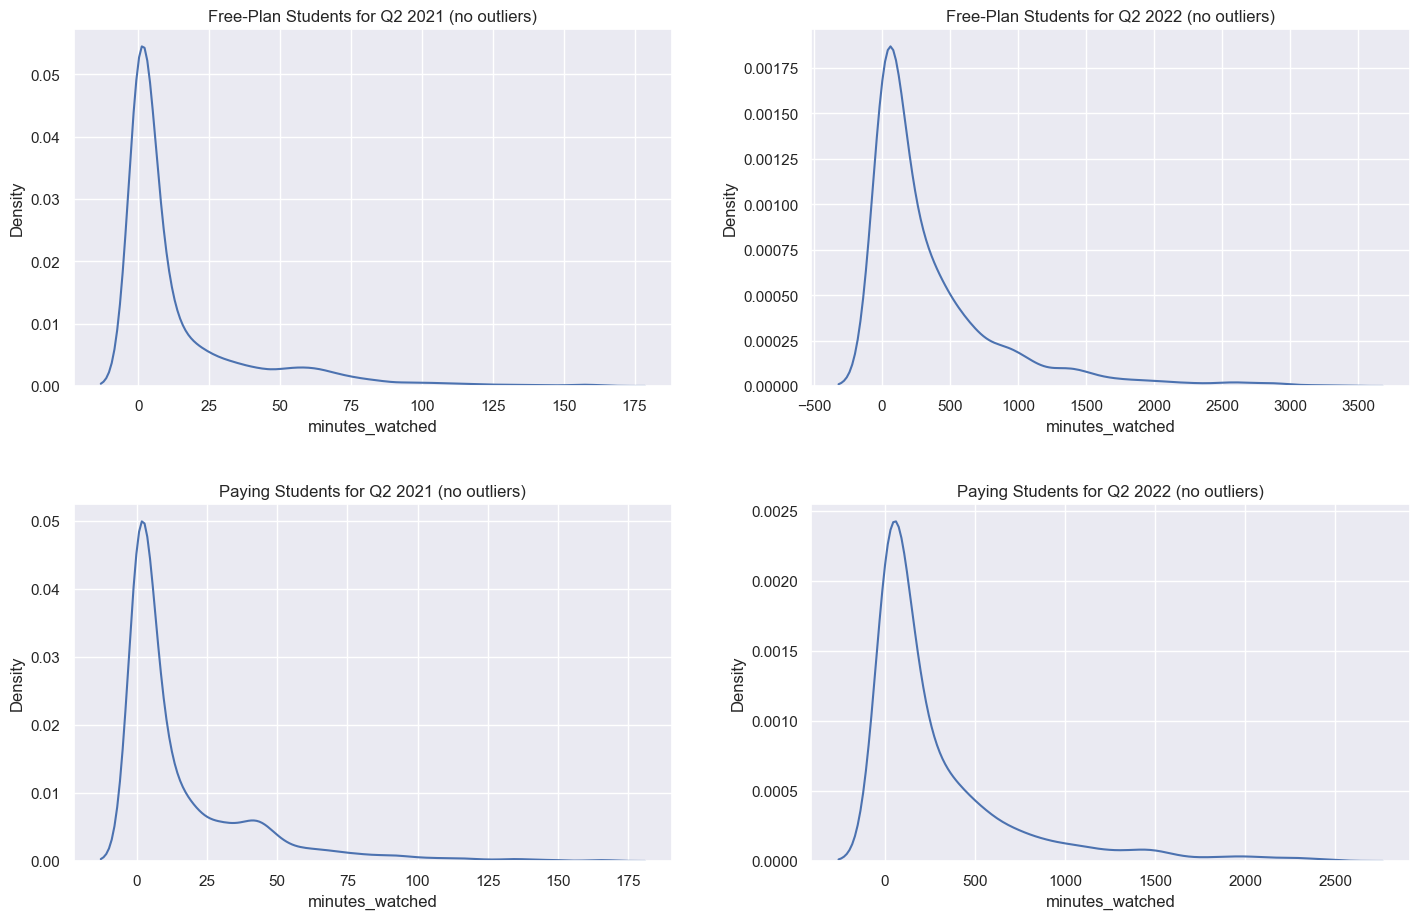

In [14]:
fig, axes = plt.subplots(2, 2, figsize = (15, 10))

sns.kdeplot(mw2021_p0_no_outliers['minutes_watched'], 
            ax = axes[0, 0]).set(title = 'Free-Plan Students for Q2 2021 (no outliers)')
sns.kdeplot(mw2021_p1_no_outliers['minutes_watched'], 
            ax = axes[0, 1]).set(title = 'Free-Plan Students for Q2 2022 (no outliers)')
sns.kdeplot(mw2022_p0_no_outliers['minutes_watched'], 
            ax = axes[1, 0]).set(title = 'Paying Students for Q2 2021 (no outliers)')
sns.kdeplot(mw2022_p1_no_outliers['minutes_watched'], 
            ax = axes[1, 1]).set(title = 'Paying Students for Q2 2022 (no outliers)')

fig.tight_layout(pad = 3.0)

plt.show()

The new distributions shows that, there are in fact significant outliers (very far away from the mean) that might distrupt our analysis.

This method of only keeping the values below 99<sup>th</sup> percentile, resulted in a distribution with much reasonable range

So, this approach of dealing with outliers removal is reasonable to do

# Save to CSV file

In [15]:
mw2021_p0_no_outliers.to_csv('minutes_watched_2021_paid_0_no_outliers.csv', index=False)
mw2021_p1_no_outliers.to_csv('minutes_watched_2021_paid_1_no_outliers.csv', index=False)
mw2022_p0_no_outliers.to_csv('minutes_watched_2022_paid_0_no_outliers.csv', index=False)
mw2022_p1_no_outliers.to_csv('minutes_watched_2022_paid_1_no_outliers.csv', index=False)